\### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [8]:
# Step 1:Display the dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('The E-Commerce Dataset.csv')
print('first 5 rows:',df.head())
print("Shape of dataset:",df.shape)




first 5 rows:    userId  timestamp                           review                  item  \
0    4051      12807        Great job for what it is!                  eBay   
1    4052     122899      Free Access Worth your Time               NetZero   
2      33      12700    AOL..I love you!!!!!!!!!!!!    AOL (America Online)   
3      33      21000     EBAY!!!  I LOVE YOU!!!! :-)*                  eBay   
4      33      22300  Blair Witch...Oh Come On.......   Blair Witch Project   

   rating  helpfulness gender                  category  item_id  item_price  \
0     5.0          2.0      F  Online Stores & Services       88      149.00   
1     5.0          0.0      F  Online Stores & Services       46       53.00   
2     5.0          4.0      F  Online Stores & Services        0      145.84   
3     5.0          4.0      F  Online Stores & Services       88      149.00   
4     1.0          4.0      F                    Movies       12       44.00   

   user_city  
0         39  


In [9]:
# Step 2:Count the number of Null values in each column and items with no reviews 
null_counts = df.isnull().sum()
none_counts=  (df['review'] == 'none').sum()
print(null_counts)
print('Number of Items which have not been reviewed:',none_counts)



userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64
Number of Items which have not been reviewed: 18


In [10]:
#  Step 3: The length of the data before removing the missing data
length_before = len(df)
print("Length of data before removing missing data:", length_before)



Length of data before removing missing data: 20000


In [11]:
# Step 4: Drop rows with any missing values in other columns 
df_cleaned= df.drop(df.index[((df['review']=='none') | (df['gender'].isna()) | (df['helpfulness'].isna())| (df['rating'].isna()))])

print(df_cleaned)
# To check that they are no outliers left, I ran a Loop 
for column in df_cleaned:
    print(column, df_cleaned[column].isna().sum()) 


       userId  timestamp                                    review  \
0        4051      12807                 Great job for what it is!   
1        4052     122899               Free Access Worth your Time   
2          33      12700             AOL..I love you!!!!!!!!!!!!     
3          33      21000              EBAY!!!  I LOVE YOU!!!! :-)*   
4          33      22300           Blair Witch...Oh Come On.......   
...       ...        ...                                       ...   
19995   10805      50600                 The Upper Class Fast Food   
19996   10806      82201             What more can you ask for????   
19997   10806      82201          Excellent steak for a good price   
19998   10807      31504                     Different story world   
19999   10808      10200  Boldly Displaying Sigourneys Cleavage ..   

                                                    item  rating  helpfulness  \
0                                                   eBay     5.0          2.0 

In [12]:
#Step 5 : Checking The Shape of the DataSet


df_cleaned.shape
# I am Checking the Shape of the DataSet to see If i deleted The missing rows

(19916, 11)

In [13]:
#Step 6 : length after missing data
length_after=len(df_cleaned)
print("Length of data after removing missing data:", length_after)

Length of data after removing missing data: 19916


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [14]:
# Q2.1
num_unique_users = len(df_cleaned['userId'].unique())
num_unique_reviews = len(df_cleaned['review'].unique())
num_unique_items = len(df_cleaned['item'].unique())
num_unique_categories = len(df_cleaned['category'].unique())
print("\nQ2.1:")
print("Number of Unique Users:",num_unique_users)
print("Number of Unique Reviews", num_unique_reviews)
print("Number of Unique items:", num_unique_items)
print("Number of Unique categories", num_unique_categories)




Q2.1:
Number of Unique Users: 8562
Number of Unique Reviews 19459
Number of Unique items: 89
Number of Unique categories 9


In [15]:
#Q2.2
print("\nQ2.2:")
print("Total number of rating records:", len(df_cleaned))
print("Mean rating:", df_cleaned['rating'].mean())
print("Standard deviation of ratings:", df_cleaned['rating'].std())
print("Minimum rating:", df_cleaned['rating'].min())
print("Maximum rating:", df_cleaned['rating'].max())


#



Q2.2:
Total number of rating records: 19916
Mean rating: 3.7017975497087767
Standard deviation of ratings: 1.4044507218710944
Minimum rating: 1.0
Maximum rating: 5.0


In [16]:
print("\nQ2.3:")
gender_item_counts = df_cleaned.groupby('gender')['item'].count()
#To do this I grouped The gender by itme and ciutned each of Them
print("mean_items_rated_Of_Both_Genders=",gender_item_counts.mean())
print("std_items_rated_Of_Both_Genders=", gender_item_counts.std())
print("min_items_rated_Of_Both_Genders=", gender_item_counts.min())
print("max_items_rated_Of_Both_Genders=", gender_item_counts.max())

# Asccording to the Data, Make and females have the same data hence they will have the same Descriptive statistics
print(gender_item_counts)


Q2.3:
mean_items_rated_Of_Both_Genders= 9958.0
std_items_rated_Of_Both_Genders= 233.3452377915607
min_items_rated_Of_Both_Genders= 9793
max_items_rated_Of_Both_Genders= 10123
gender
F     9793
M    10123
Name: item, dtype: int64


In [17]:
#Q2.4
print("\nQ2.4:")

ratings_per_item = df_cleaned.groupby('item_id')['rating'].count()

print("ratings_per_items_mean=",ratings_per_item.mean())
print("ratings_per_item_std=", ratings_per_item.std())
print("ratings_per_item_min=", ratings_per_item.min())
print("ratings_per_item_max",ratings_per_item.max())

print(ratings_per_item)


Q2.4:
ratings_per_items_mean= 223.77528089887642
ratings_per_item_std= 116.4189879085832
ratings_per_item_min= 139
ratings_per_item_max 939
item_id
0     939
1     657
2     157
3     240
4     185
     ... 
84    210
85    160
86    245
87    173
88    596
Name: rating, Length: 89, dtype: int64


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

In [18]:
#Printing the data which has been cleaned in Q1
df_cleaned

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


<Figure size 1000x600 with 0 Axes>

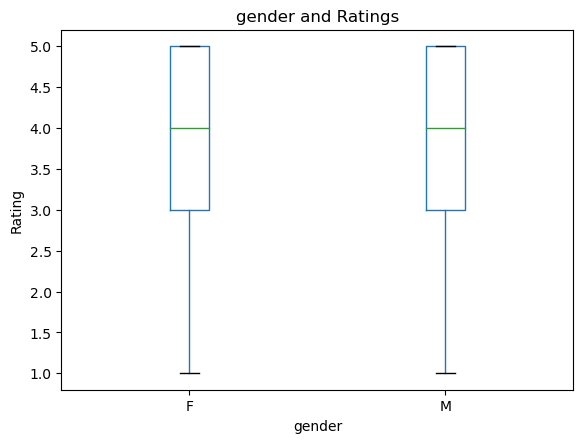

In [19]:
# Figure 1: Gender and Ratings
plt.figure(figsize=(10, 6))
df_cleaned.boxplot(column='rating', by='gender', grid=False)
plt.title('gender and Ratings')
plt.xlabel('gender')
plt.ylabel('Rating')
plt.suptitle('')
plt.show()


 As Figure 1 shows it is a identical boxplot with each gender and rating. this makes sence becuase their ratings are both between 1 to 5 which means that the mean, Quartile 1 and Quartile 3 will be exactly the same hence no gender is rated better than others 

<Figure size 1000x600 with 0 Axes>

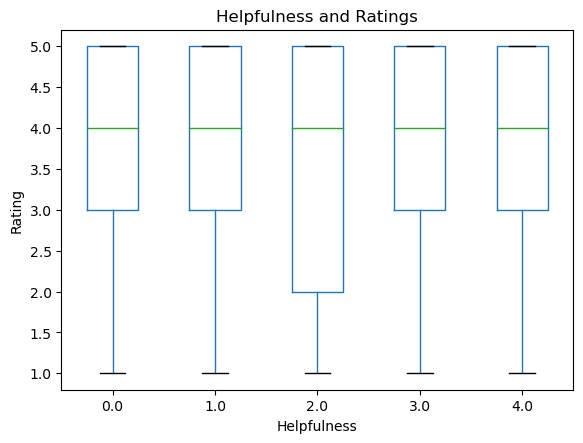

In [21]:
# Figure 2: Helpfulness and Ratings
plt.figure(figsize=(10, 6))
df_cleaned.boxplot(column='rating', by='helpfulness', grid=False)
plt.title('Helpfulness and Ratings')
plt.xlabel('Helpfulness')
plt.ylabel('Rating')
plt.suptitle('')
plt.show()
 

 Figure 2 shows the relationship between Helpfulness and rating. The boxplot is identical for gender and rating except for when helpfulness is 2.0, then more values are being included thus skewing the box plot to the left.

<Figure size 1200x600 with 0 Axes>

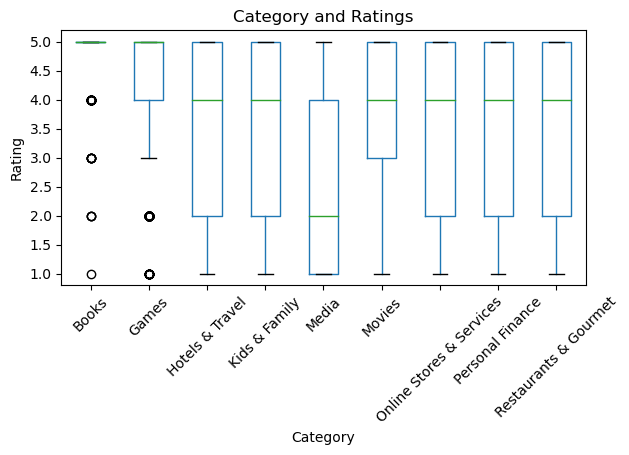

In [78]:
# Figure 3: Category and Ratings
plt.figure(figsize=(12, 6))
df_cleaned.boxplot(column='rating', by='category', grid=False, rot=45)
plt.title('Category and Ratings')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.suptitle('')
plt.tight_layout()
plt.show()


For the category of books nearly all the of the ratings are 100% except for a couple of outliers. 

For the games category nearly 50% of the ratings ratings are 100%.

For the hotels and travel category . The ratings for 25%(q1) are all 2 star reviews however 50%(mean) of the data 4 stars reviews with the boxplot being skewed to the left and then taking a really big up to 5 star for 75%(q3) in the case of this boxplot though the q3= max value.

The Kids and family is exactly the same distribution as hotels and games.

For media the first 25% of data is equal to minimum value before going up to 50% for mean of 2. The 75% of the data lies between 1-4 with the max being 5 skewing the boxplot to the right.It is teh same plot as kids and family however its skewed in the different direction.

For movies 25% of data lies between 1-3 while 50% of data lies between 1-4, 75% lies between 1 and 5 being the same as 100%.

For online stores and services it is the same distribution as hotel and travel.

For personal finance it is the same distribution as online stores and services.

For reestaurant and gourmet it is the exact same as online stores and services.

Overall these boxplot shows the relationship between category and ratings. majority of the graphs shows that the ratings are very high.





#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [22]:
Data = df_cleaned[df_cleaned['helpfulness'] > 2]

# Calculate the number of ratings per user
user_rating_counts = Data['userId'].value_counts()

# Filter users with at least 7 ratings
users_to_keep = user_rating_counts[user_rating_counts > 7].index

# Calculate the number of ratings per item
item_rating_counts = Data['item_id'].value_counts()

# Filter items with at least 11 ratings
items_to_keep = item_rating_counts[item_rating_counts > 11].index

# Apply both filters using boolean indexing
filtered_Data = Data[
    (Data['userId'].isin(users_to_keep)) &
    (Data['item_id'].isin(items_to_keep))
]

len(filtered_Data)

2209